## Assignment
Yeah ! Let's start with our actual project. In this assignment we will load the database and do preprocessing tasks.
Ensure you have following packages installed
1. numpy
2. pandas  
( Hope you are familiar with above two modules well )
3. nltk (don't worry, we just need this to remove stopwords while preprocessing)
4. tensorflow
5. keras
6. scikit-learn

In [3]:
'''
Importing essential libraries and functions
'''
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import io
import json
from nltk.tokenize import word_tokenize

## 1. Loading the IMDB Reviews Dataset

In [4]:
# TODO:
df=pd.read_csv("C:\IIT B\IMDB Reviews Sentiment Analysis\IMDB_Dataset.csv")

In [5]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df.shape
# 50000 rows and 2 columns

(50000, 2)

In [7]:
df.isnull().sum()
# no missing data

review       0
sentiment    0
dtype: int64

In [8]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [9]:
# From here we can see that the data is balanced i.e equal number of samples in both the categories

## 2. Data Preprocessing

In [10]:
#TODO : Complete the function to preprocess the text data

def preprocessing(sentence):
    sentence=sentence.lower() # First make the sentence lowercase
    sentence=re.sub(r'<[^>]+>',' ',sentence) # Remove all html tags from the sentence i.e replace anything between <> with space
    sentence=re.sub(r'[^a-zA-Z0-9]',' ',sentence)     # Remove all special characters i.e. anything other than alphabets and numbers. Replace them with space
    sentence=re.sub(r'\b[a-zA-Z]\b',' ',sentence) # Remove all single characters i.e. a-z and A-Z and Replace them with space
    sentence=re.sub(r'\s+',' ',sentence) # Remove all multiple spaces and replace them with single space
    # Use the nltk library to remove all stopwords from the sentence
    stop_words = set(stopwords.words('english'))
    sentence = word_tokenize(sentence)
    filtered_words = [i for i in sentence if i.lower() not in stop_words]
    cleaned_sentence = ' '.join(filtered_words)
    return cleaned_sentence

In [11]:
print(preprocessing('SAHIL IS A <****> BOY !?!'))

sahil boy


In [12]:
# TODO :
# Call the preprocessing function for each review in the dataframe and
# save the results in a new list of preprocessed_reviews
preprocessed_reviews=[]
for i in range(0,df.shape[0]):
    list=df['review'].tolist()
    text=list[i]
    text=preprocessing(text)
    preprocessed_reviews.append(text)
    
# This list will be your input to the neural network
# We will call this list as X from now on
X=preprocessed_reviews

In [13]:
# TODO :

df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})# Convert sentiment column in the dataframe to numbers
y=np.array(df['sentiment'])# Convert positive to 1 and negative to 0 and store it in numpy array
y=y.reshape(50000,1)
# We will call this numpy array as y from now on

C:\Users\Sahil\AppData\Local\Temp\ipykernel_19248\364436640.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment']=df['sentiment'].replace({'positive':1,'negative':0})# Convert sentiment column in the dataframe to numbers


In [14]:
# TODO : Split the data into training and testing (80-20 ratio)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

In [15]:
Y_train_=Y_train.reshape(40000,)

## word_tokenize and lemmatization and keras tokenizer

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Function to tokenize and lemmatize a sentence without POS tagging
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Tokenize and lemmatize the text data
X_train = [' '.join(tokenize_and_lemmatize(text)) for text in X_train]
X_test = [' '.join(tokenize_and_lemmatize(text)) for text in X_test]

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert the text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

#### Padding

In [18]:
# Padding all reviews to be of same length 'maxlen' words
maxlen = 100
# You can try different dimensions like 50, 100, 200 and 300
# and see how the model performs in next week

# TODO: Pad the training data sequences
X_train_pad=pad_sequences(X_train_sequences,padding='post',maxlen=maxlen)
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen

# TODO: Pad the test data sequences
X_test_pad=pad_sequences(X_test_sequences,padding='post',maxlen=maxlen)
# Hint: Use pad_sequences with 'post' padding and maxlen=maxlen

#### Glove Embedding

In [19]:

# Initialize an empty dictionary for embeddings
embeddings_dictionary = dict()

# Open the GloVe file (a2_glove.6B.100d.txt) with utf-8 encoding
glove_file = open("C:\IIT B\IMDB Reviews Sentiment Analysis\glove_embeddings.txt", encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# TODO : Create an embedding matrix where each row corresponds to the index of the unique word in the dataset and each column corresponds to the word vector in the GloVe embedding So the matrix will have vocab_length rows and maxlen columns
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [20]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38251001,  0.14821   ,  0.60601002, ...,  0.058921  ,
         0.091112  ,  0.47283   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40502   ,  0.43331999, -1.03149998, ...,  0.61971003,
         0.31612   ,  0.18486001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
embedding_matrix.shape

(83234, 100)

In [22]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Embedding,BatchNormalization, Dropout
from keras.optimizers import Adam

In [23]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
input_length = maxlen  # maxlen

In [24]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=input_length, 
                    trainable=False))

model.add(LSTM(256))



model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))



model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

C:\IIT B\Python Virtual Env\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       8,323,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,323,400 (31.75 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,323,400 (31.75 MB)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_accuracy',restore_best_weights=True,patience=20,verbose=1)

In [27]:
# Cool we have 9.2M non-trainable parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history=model.fit(X_train_pad,Y_train,validation_split=0.2,epochs=15,batch_size=64,callbacks=es)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 159s 313ms/step - accuracy: 0.5835 - loss: 0.6660 - val_accuracy: 0.5854 - val_loss: 0.6679
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 200s 309ms/step - accuracy: 0.7092 - loss: 0.5630 - val_accuracy: 0.7909 - val_loss: 0.4321
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 155s 310ms/step - accuracy: 0.8266 - loss: 0.3893 - val_accuracy: 0.8438 - val_loss: 0.3616
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 155s 311ms/step - accuracy: 0.8469 - loss: 0.3589 - val_accuracy: 0.8510 - val_loss: 0.3375
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 155s 310ms/step - accuracy: 0.8565 - loss: 0.3309 - val_accuracy: 0.8634 - val_loss: 0.3230
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 157s 313ms/step - accuracy: 0.8747 - loss: 0.2961 - val_accuracy: 0.8581 - val_loss: 0.3184
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 155s 311ms/step - accuracy: 0.8798 - loss: 0.2781 - val_accuracy: 0.8666 - val_loss: 0.3118
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 153s 307ms/step - accuracy: 0.8960 -

# GRAPHS

> Loss vs Valdiation loss

In [29]:
import matplotlib.pyplot as plt

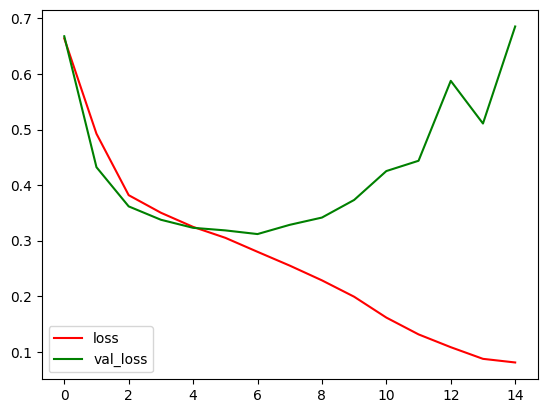

In [46]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.legend(['loss','val_loss'])
# the model is not overfitting 

> Accuracy vs val_accuracy

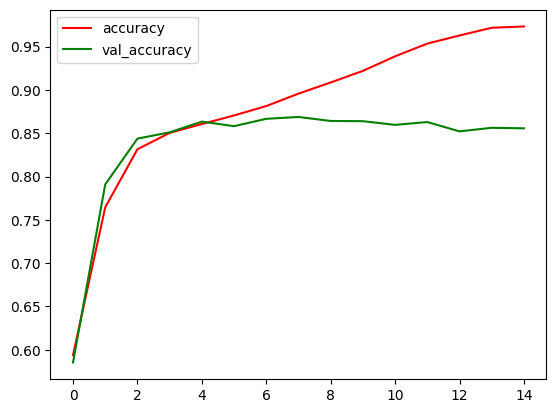

In [47]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.legend(['accuracy','val_accuracy'])
# the model is not overfitting 

# ACCURACY OF OUR MODEL

In [48]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve, roc_auc_score,auc
# let us firstly figure out the threshhold using roc_curve
# and then we will move towards other metrics 

In [49]:
Y_scores=model.predict(X_test_pad)

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step


In [50]:
Y_scores=Y_scores.reshape(10000,)
Y_scores

array([0.9907999 , 0.9911147 , 0.22471815, ..., 0.72334146, 0.99978286,
       0.01871531], dtype=float32)

In [51]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)

In [52]:
thresholds

array([          inf, 9.9999732e-01, 9.9996650e-01, ..., 4.9641863e-03,
       4.9429950e-03, 2.5890043e-04], dtype=float32)

In [53]:
fpr

array([0.        , 0.        , 0.        , ..., 0.93898033, 0.93938177,
       1.        ])

In [54]:
tpr

array([0.00000000e+00, 1.99282583e-04, 1.99282583e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

Text(0, 0.5, 'TPR')

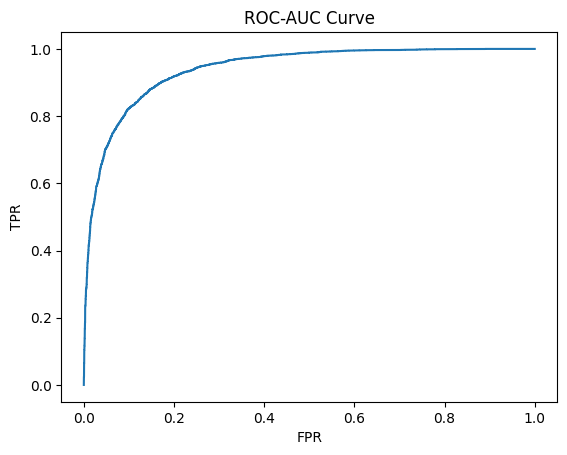

In [55]:
plt.plot(fpr,tpr)
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### WE WANT THE THRESHOLD FOR WHICH TPR-FPR CURVE IS CLOSEST TO (0,1) i.e the point where the difference between tpr and fpr is max

In [56]:
optimal_idx = np.argmax(tpr - fpr) # THIS IS THE 
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.47646818


## AREA UNDER THE ROC-AUC CURVE

In [57]:
A=auc(fpr,tpr)
# Trpezoidal rule to calculate the area under the curve

In [58]:
score=roc_auc_score(Y_test,Y_scores)
score

0.9404127877497293

In [80]:
Y_pred=np.where(Y_scores>=optimal_threshold,1,0)
print(accuracy_score(Y_pred,Y_test))

0.9045940412787749


In [79]:
print(f1_score(Y_pred,Y_test))

0.9092323289137322


## ROC -AUC FOR MULITCLASS CLASSIFICATION BECOMES VERY COMPLEX AND THUS WE DONT USUALLY USE IT THERE , ALSO WE HAVE GOOD METRICS LIKE F1 ETC WHICH ARE SIMPLE TO UNDERSTAND AS WELLL